#### Import Library

In [1]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#### Fungsi untuk ekstraksi fitur GLCM

In [2]:
def extract_glcms_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_image, distances=[1], angles=[135], levels=256, symmetric=True, normed=True)
    properties = ['contrast', 'homogeneity', 'energy', 'correlation']
    glcm_features = [graycoprops(glcm, prop).ravel()[0] for prop in properties]
    return glcm_features

#### Fungsi untuk ekstraksi fitur HSV

In [3]:
def extract_hsv_features(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #Opencv defaultnya is BGR
    h, s, v = cv2.split(hsv_image)
    hsv_features = [np.mean(h), np.mean(s), np.mean(v)]
    return hsv_features

#### Path ke folder dataset

In [4]:
dataset_paths = {
    'aeromonas': 'ManualDataset/Training/Aeromonas',
    'penyakit_lain': 'LibraryDataset/Training/Penyakit_Lain/',
    'sehat': 'LibraryDataset/Training/Sehat'
}

#### Membuat list untuk menampung data

In [5]:
data = []

#### Iterasi Ekstraksi Fitur melalui setiap label dan direktori untuk dimasukan ke dataframe Pandas

In [6]:
for label, path in dataset_paths.items():
    # Mendapatkan daftar file dalam direktori
    files = os.listdir(path)
    # Iterasi melalui setiap file
    for file in files:
        # Membaca gambar
        image = cv2.imread(os.path.join(path, file))
        # Ekstraksi fitur HSV
        hsv_features = extract_hsv_features(image)
        # Ekstraksi fitur GLCM
        glcm_features = extract_glcms_features(image)
        # Menambahkan label
        features = hsv_features + glcm_features + [label]
        # Menambahkan data ke list
        data.append(features)

#### Membuat dataframe dari list data

In [7]:
columns = ['Hue', 'Saturation', 'Value', 'contrast', 'homogeneity', 'energy', 'correlation', 'label']
df_dataset = pd.DataFrame(data, columns=columns)

In [8]:
df_dataset

,Hue,Saturation,Value,contrast,homogeneity,energy,correlation,label
0,75.078456,105.656833,112.187289,52.981338,0.355772,0.070455,0.984654,aeromonas
1,82.334322,107.016022,120.830789,46.545106,0.313535,0.026541,0.979863,aeromonas
2,98.807256,65.522778,121.407756,148.041081,0.224553,0.017778,0.966914,aeromonas
3,91.900344,64.590611,113.177033,132.184749,0.268114,0.065189,0.977797,aeromonas
4,87.042733,63.905711,108.681122,112.207748,0.306339,0.114568,0.983261,aeromonas
...,...,...,...,...,...,...,...,...
515,22.295556,112.992789,124.835844,45.749833,0.446373,0.083639,0.993298,sehat
516,23.332744,113.554778,124.294244,44.931695,0.446766,0.085772,0.993463,sehat
517,25.205789,117.785922,137.313456,32.143077,0.397393,0.030564,0.994314,sehat
518,24.724400,117.475111,137.327556,31.820368,0.397299,0.030570,0.994372,sehat


#### Membaca Gambar Testing

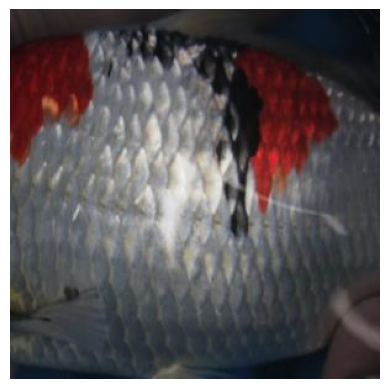

In [22]:
test_image_path = 'ManualDataset/Testing/_MG_8889_JPG.rf.4c628c77a98d626d406c0fead6210fbe.jpg'
test_image = cv2.imread(test_image_path)
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image_rgb)
plt.axis('off')  # Hilangkan sumbu
plt.show()

#### Ekstraksi fitur untuk Testing

In [23]:
hsv_features_test = extract_hsv_features(test_image)
glcm_features_test = extract_glcms_features(test_image)
columns = ['Hue', 'Saturation', 'Value', 'contrast', 'homogeneity', 'energy', 'correlation']
data_test = [hsv_features_test + glcm_features_test]

#### Simpan Hasil Ekstraksi Fitur Testing ke Dataframe Baru

In [24]:
df_test = pd.DataFrame(data_test, columns=columns)
df_test

,Hue,Saturation,Value,contrast,homogeneity,energy,correlation
0,90.935411,53.421267,87.539578,55.050914,0.322336,0.02847,0.987303


#### Fungsi perhitungan KNN

In [25]:
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

#### Menambahkan kolom baru 'distance' ke dataframe dataset

In [26]:
df_dataset['distance'] = 0.0

#### Melakukan Perhitungan melalui setiap baris df_test dan df_dataset untuk menghitung nilai jarak x dan y

In [27]:
for i in range(len(df_test)):
    for j in range(len(df_dataset)):
        
        # Mengambil vektor x dan y dari df_test dan df
        x = df_test.iloc[i]
        y = df_dataset.iloc[j]
        
        # Menghitung jarak antara vektor x dan y
        distance = calculate_distance(x, y)
        
        # Menyimpan hasil perhitungan jarak ke dalam kolom 'distance' pada dataframe df
        df_dataset.at[j, 'distance'] = distance


#### Lihat Hasil Perhitungan distance pada kolom "distance"

In [28]:
df_dataset

,Hue,Saturation,Value,contrast,homogeneity,energy,correlation,label,distance
0,75.078456,105.656833,112.187289,52.981338,0.355772,0.070455,0.984654,aeromonas,59.931571
1,82.334322,107.016022,120.830789,46.545106,0.313535,0.026541,0.979863,aeromonas,64.241966
2,98.807256,65.522778,121.407756,148.041081,0.224553,0.017778,0.966914,aeromonas,100.013235
3,91.900344,64.590611,113.177033,132.184749,0.268114,0.065189,0.977797,aeromonas,82.052406
4,87.042733,63.905711,108.681122,112.207748,0.306339,0.114568,0.983261,aeromonas,61.959283
...,...,...,...,...,...,...,...,...,...
515,22.295556,112.992789,124.835844,45.749833,0.446373,0.083639,0.993298,sehat,98.679968
516,23.332744,113.554778,124.294244,44.931695,0.446766,0.085772,0.993463,sehat,98.180867
517,25.205789,117.785922,137.313456,32.143077,0.397393,0.030564,0.994314,sehat,107.076635
518,24.724400,117.475111,137.327556,31.820368,0.397299,0.030570,0.994372,sehat,107.262760


#### Mencari nilai distance terkecil dan indeks baris yang sesuai

In [29]:
def classify_with_knn(df_dataset, k):
    
    # Mengurutkan dataframe berdasarkan kolom 'distance'
    df_dataset = df_dataset.sort_values(by='distance')
    
    # Mengambil indeks terdekat sebanyak K
    min_distance_indices = df_dataset.index[:k]
    
    # Mengambil label untuk indeks-indeks tersebut
    labels = df_dataset.loc[min_distance_indices, 'label']
    
    # Menghitung jumlah masing-masing label
    label_counts = labels.value_counts()
    
    # Jika labelnya cuman 1, langsung return hasil klasifikasi
    if len(label_counts) == 1:
        classification_result = label_counts.index[0]
        return "Hasil klasifikasi: Ikan " + classification_result
    
    # Jika terdapat label dengan jumlah yang sama, print informasi K perlu diubah
    max_count = label_counts.max()
    equal_counts = label_counts[label_counts == max_count]
    if len(equal_counts) > 1:
        return "Nilai K perlu diubah"
    
    # Jika tidak, kembalikan hasil klasifikasi berdasarkan label terbanyak
    else:
        classification_result = label_counts.idxmax()
        return "Hasil klasifikasi: Ikan " + classification_result

#### Hasil Klasifikasi Gambar

In [33]:
k = 5
result = classify_with_knn(df_dataset, k)
print(result)

Hasil klasifikasi: Ikan sehat


#### Hitung Akurasi Manual dengan semua Data Testing

In [21]:
# Fungsi untuk menghitung akurasi
def calculate_accuracy(predictions, true_labels):
    correct_count = sum(predictions == true_labels)
    total_count = len(true_labels)
    accuracy = (correct_count / total_count) * 100
    return accuracy

# Path ke folder dataset testing
testing_dataset_path = 'ManualDataset/Testing/'

# Baca file testing_labels.csv
testing_labels_df = pd.read_csv('testing_labels.csv')

# Ambil kolom true_label
true_labels = testing_labels_df['true_label']

# List untuk menyimpan prediksi hasil klasifikasi
predictions = []

# Iterasi melalui setiap gambar di folder testing dan melakukan klasifikasi
for file, true_label in zip(os.listdir(testing_dataset_path), true_labels):
    if file.endswith('.jpg'):
        # Membaca gambar uji
        test_image_path = os.path.join(testing_dataset_path, file)
        test_image = cv2.imread(test_image_path)
        
        # Perbarui distance pada dataframe df_dataset
        for j in range(len(df_dataset)):
            x = df_test.iloc[0]  # Hanya satu baris di df_test
            y = df_dataset.iloc[j]
            distance = calculate_distance(x, y)
            df_dataset.at[j, 'distance'] = distance
        
        # Ekstraksi fitur untuk gambar uji
        hsv_features_test = extract_hsv_features(test_image)
        glcm_features_test = extract_glcms_features(test_image)
        data_test = [hsv_features_test + glcm_features_test]
        df_test = pd.DataFrame(data_test, columns=columns)
        
        # Klasifikasi menggunakan KNN
        result = classify_with_knn(df_dataset, k)
        
        # Menambahkan prediksi ke dalam list
        predictions.append(result.split()[-1])

# Menghitung akurasi
accuracy = calculate_accuracy(np.array(predictions), np.array(true_labels))
print("Akurasi: {:.2f}%".format(accuracy))

Akurasi: 46.25%
